In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [23]:
# Load the dataset
dataset = pd.read_csv('orbit.csv')  # Update with your actual dataset path


In [24]:
# Explore the dataset
print(dataset.head())
print(dataset.info())

   time_steps           y
0  -10.000000  100.000000
1   -9.989995   99.800000
2   -9.979990   99.600200
3   -9.969985   99.400601
4   -9.959980   99.201201
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_steps  2000 non-null   float64
 1   y           2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB
None


In [25]:

# Handling missing values (if any)
dataset = dataset.dropna()

# Splitting dataset into features (time_steps) and target (y)
X = dataset[['time_steps']].values  # Independent variable (time)
y = dataset[['y']].values  # Dependent variable (orbital position)

# Normalize the dataset (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
# Build the neural network model for polynomial regression
model = Sequential()
# Add layers to the model
# make first layer with 64 neurons and relu activation function
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# make second layer with 64 neurons and relu activation function
model.add(Dense(64, activation='relu'))
# make output layer with 1 neuron and linear activation function
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Train the model
# verbose=1 displays the progress of training (e.g., loss, accuracy) in the console
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# R² ranges from 0 to 1, where 1 means perfect predictions, and 0 means no predictive power
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1945.7969 - mae: 32.6413 - val_loss: 1837.3003 - val_mae: 32.6224
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1653.2457 - mae: 29.3100 - val_loss: 1240.6392 - val_mae: 26.0224
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1016.3429 - mae: 22.5356 - val_loss: 507.4918 - val_mae: 17.6760
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 468.7209 - mae: 17.8733 - val_loss: 309.0169 - val_mae: 15.2826
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 316.3516 - mae: 15.8215 - val_loss: 243.9137 - val_mae: 13.7491
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 248.2727 - mae: 14.0818 - val_loss: 195.4208 - val_mae: 12.3810
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 187.7137 - mae: 12.1972 - val_loss: 158.7132 - val_mae: 11.2422
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 162.4133 - mae: 11.4188 - val_loss: 127.2176 - val_mae: 9.9246
Epoch 9/100


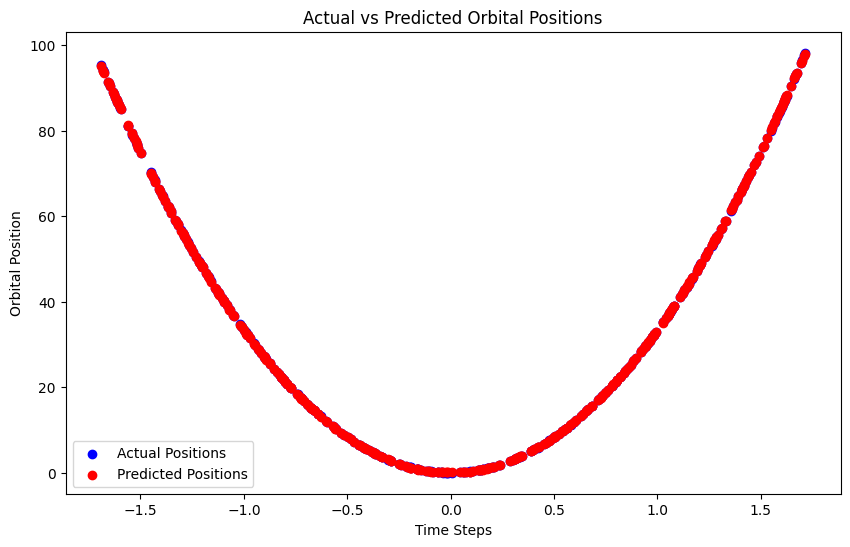

In [28]:
# Visualize the actual vs predicted positions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Positions')
plt.scatter(X_test, y_pred, color='red', label='Predicted Positions')
plt.title('Actual vs Predicted Orbital Positions')
plt.xlabel('Time Steps')
plt.ylabel('Orbital Position')
plt.legend()
plt.show()

# # Save the model and scaler (optional)
# model.save('orbital_model.h5')